# Numpy-arrayer

## Introduktion

Hittills har vi använt listor för att manipulera serier av nummer (till exempel x och y för en graf). För att manipulera numren i dessa listor har vi behövt använda loopar.

Som exempel har vi extraherat data för UV-vis-spektrumet för en vattenmolekyl för att rita en graf:

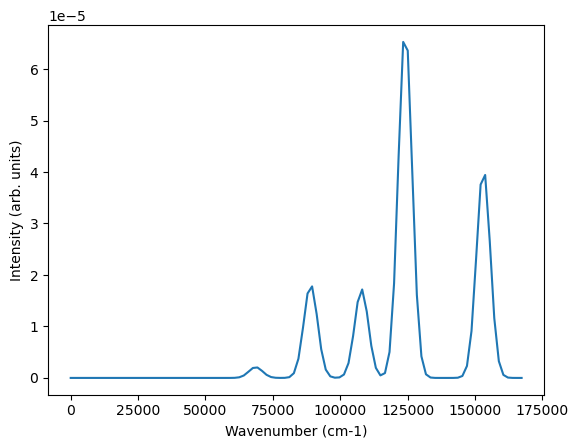

In [1]:
import matplotlib.pyplot as plt

# Läs data från en fil
energies = []
intensities = []
with open('water_spectrum.txt') as f:
    lines = f.read().splitlines()
    for line in lines:
        x,y = line.split(",")
        energies.append(float(x))
        intensities.append(float(y))

plt.figure()
plt.plot(energies, intensities)
plt.xlabel("Wavenumber (cm-1)")
plt.ylabel("Intensity (arb. units)")
plt.show()

**Övning:** Nu vill vi ändra enheterna från cm$^{-1}$ till eV (1 cm$^{-1}$ = 0,00012398 eV). Skriv en kod för att göra detta och rita resultatet:

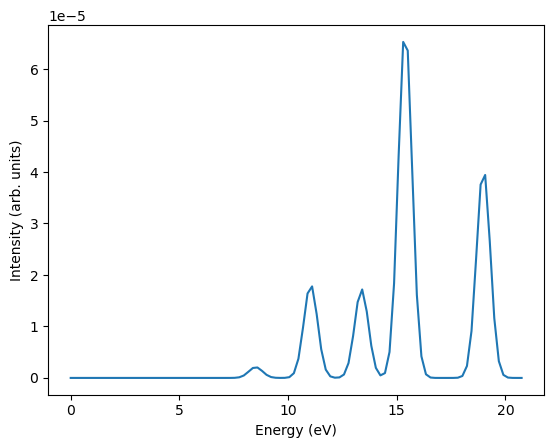

In [2]:
### BEGIN SOLUTION
energies_ev = []
for ene in energies:
    energies_ev.append(ene*0.00012398)

plt.figure()
plt.plot(energies_ev, intensities)
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()
### END SOLUTION

Det skulle ha varit frestande att helt enkelt multiplicera hela listan med konverteringskonstanten. Men listor är inte begränsade till bara nummer, och på grund av detta är deras inbyggda funktioner inte optimala för nummer. Kom ihåg till exempel vad som händer när du multiplicerar en lista med 2:

In [3]:
mylist = [0, 1, 2, 3, 4, 5]
print(mylist*2)

[0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]


Detta är inte alls vad vi ville ha, men det är meningsfullt i listornas logik som en samling av objekt. Du har faktiskt duplicerat den samlingen.

Som tur är finns det ett bibliotek i python som är speciellt utformat för att hantera listor av nummer: numpy. Som för alla bibliotek behöver det importeras först. På grund av hur användbart det är, ges det ofta ett kortare namn "np".

In [4]:
import numpy as np

Nu kan vi gå tillbaka till vårt ursprungliga problem. Vi kan skapa en numpy array från en pythonlista:

In [5]:
myarray = np.array(mylist)
print(myarray)

[0 1 2 3 4 5]


Numpy-arrayer har flera viktiga skillnader jämfört med python-listor. De kan bara innehålla en enda variabeltyp (ingen blandad data) och har en fast längd. Det innebär att det, till skillnad från python-listor, är svårt att ändra storleken på dem. Internt, när en numpy-array ändrar storlek, måste python i stället skapa en kopia.

Å andra sidan är de lättare att manipulera i numerisk kontext, och ofta kan vi helt undvika loopar. Särskilt addition och multiplikation beter sig mycket annorlunda:

In [6]:
print(myarray * 2)
print(myarray / 3)
print(myarray + 1)

[ 0  2  4  6  8 10]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[1 2 3 4 5 6]


**Övning:** Gör om konverteringen av spektret, men använd nu en numpy-array (observera att matplotlib kan läsa både numpy-arrayer och python-listor).

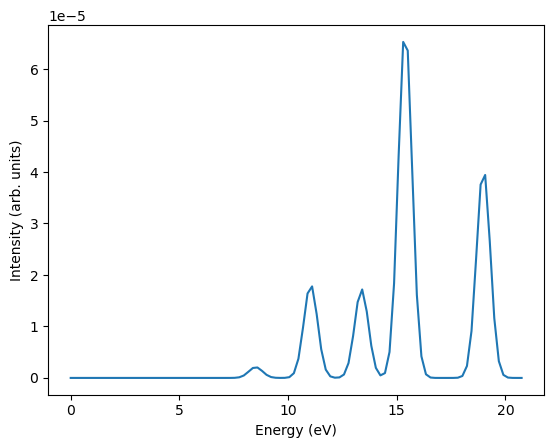

In [7]:
### BEGIN SOLUTION
np_energies_ev = np.array(energies) * 0.00012398
np_intensities = np.array(intensities)

plt.figure()
plt.plot(np_energies_ev, np_intensities)
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()
### END SOLUTION

## Skapa numpy-arrayer

Det finns flera sätt att skapa numpy-arrayer. Det första är att omvandla befintliga python-objekt, som vi redan har sett:

In [8]:
print(np.array([0,1,2,3,4,5]))
print(np.array((0,1,2,3,4,5)))
print(np.array(range(6)))

[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]


Men det finns också inbyggda funktioner i numpy för att skapa specifika array:er:

In [9]:
print(np.zeros(10))  # en numpy-array med nollor av längd 10
print(np.ones(10))  # en numpy-array med ettor av längd 10
print(np.arange(10))  # en numpy-variant av range
print(np.arange(0, 10, 0.5))  # fungerar också med icke-heltalssteg
print(np.linspace(0, 10, 21))  # 21 jämnt fördelade tal mellan 0 och 10
print(np.random.rand(10))  # 10 slumpmässiga tal (som standard mellan 0 och 1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 1 2 3 4 5 6 7 8 9]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
[0.3749867  0.72827681 0.0934094  0.7800325  0.57173762 0.33479728
 0.46445638 0.44649075 0.08205604 0.26018457]


Till skillnad från listor kan numpy-arrayer bara innehålla element av samma typ. När en numpy-array skapas från en python-lista väljer den datatypen som passar allt. Du kan kontrollera datatypen för arrayen med egenskapen "dtype".

In [10]:
# Från heltal -> heltal
a = np.array([0, 1, 2])
print("från heltal:", a.dtype)

# Från flyttal -> flyttal
a = np.array([0.0, 1.0, 2.0])
print("från flyttal:", a.dtype)

# Från blandning av heltal och flyttal -> flyttal (mer generellt)
a = np.array([0, 1.0, 2])
print("från blandning heltal-flyttal:", a.dtype)

# Från booleans -> booleans
a = np.array([True, False, True])
print("från booleans:", a.dtype)

# Från blandning av heltal och booleans -> heltal (True betraktas som 1, False som 0)
a = np.array([True, False, 2])
print("från blandning:", a.dtype, "a =", a)

# Från strängar och tal -> strängar
a = np.array(["Hej", "världen", 1, 2])
print("från strängar och tal: a =", a)

från heltal: int64
från flyttal: float64
från blandning heltal-flyttal: float64
från booleans: bool
från blandning: int64 a = [1 0 2]
från strängar och tal: a = ['Hej' 'världen' '1' '2']


Du kan tvinga datatypen för arrayen genom att ange den eller konvertera den i efterhand.

In [11]:
array1 = np.array(range(10))
print(array1)

# Begär en float-array
array2 = np.array(range(10), dtype=float)
print(array2)

# Konvertera array1 till float
array3 = array1.astype(float)
print(array3)

# Att utföra matematik kommer också att fungera
array4 = array1 * 1.0
print(array4)

[0 1 2 3 4 5 6 7 8 9]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


Som tidigare förklarat rekommenderas det inte att ändra storleken på numpy-arrayer, eftersom det är ineffektivt för koden. Det är dock möjligt om det behövs.

In [12]:
a = np.arange(10)
print(a)
print(np.append(a, 10))

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 10]


# Åtkomst av numpy-arrayer

På många sätt beter sig numpy-arrayer som listor:

In [13]:
a = np.arange(0, 5, 0.5)
print(a)

# Mäta längd
print("Antal element i a:",len(a))

# Åtkomst med []
print("Element 2 är:",a[2])

# Kan loopas igenom
print("Listan över element är:")
for ax in a:
    print(ax)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
Antal element i a: 10
Element 2 är: 1.0
Listan över element är:
0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5


# Operationer

Vi har sett hur numpy-arrayer beter sig med addition och multiplikation, men det finns många fler operationer som kan göras, på liknande sätt som med vanliga tal.

In [14]:
a = np.arange(0, 5, 0.5)
print("a       =", a)
print("a mod 2 =", a%2)
print("a^2     =", a**2)
print("sqrt(a) =", np.sqrt(a))
print("cos(a)  =", np.cos(a))

a       = [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
a mod 2 = [0.  0.5 1.  1.5 0.  0.5 1.  1.5 0.  0.5]
a^2     = [ 0.    0.25  1.    2.25  4.    6.25  9.   12.25 16.   20.25]
sqrt(a) = [0.         0.70710678 1.         1.22474487 1.41421356 1.58113883
 1.73205081 1.87082869 2.         2.12132034]
cos(a)  = [ 1.          0.87758256  0.54030231  0.0707372  -0.41614684 -0.80114362
 -0.9899925  -0.93645669 -0.65364362 -0.2107958 ]


Numpy innehåller också funktioner för att hitta minsta och största värdet samt medelvärdet av en array.

In [15]:
a = np.array([0,-2.0, 1.2, 3.5, 4.0, -0.5])
print("Min-värdet av a är",np.min(a), "och är element nummer", np.argmin(a))
print("Max-värdet av a är",np.max(a), "och är element nummer", np.argmax(a))
print("Medelvärdet av a är",np.mean(a))
print("Sorterad a:", np.sort(a), "med element:", np.argsort(a))

Min-värdet av a är -2.0 och är element nummer 1
Max-värdet av a är 4.0 och är element nummer 4
Medelvärdet av a är 1.0333333333333334
Sorterad a: [-2.  -0.5  0.   1.2  3.5  4. ] med element: [1 5 0 2 3 4]


**Övning:** Använd min/max-funktionerna för att omvandla y-axeln så att maxvärdet i spektret blir 1.

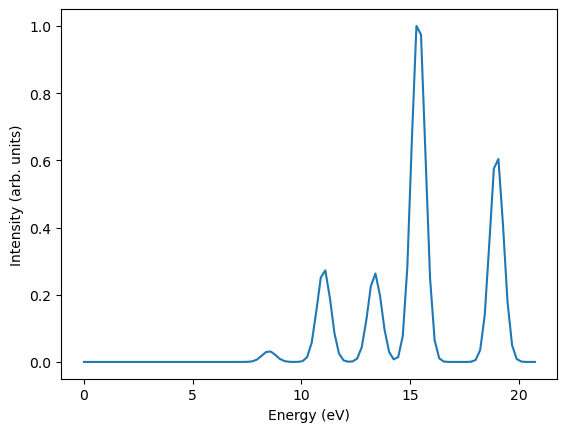

In [16]:
### BEGIN SOLUTION
int_max = np.max(np.array(intensities))
np_intensities = np.array(intensities)/int_max

plt.figure()
plt.plot(np_energies_ev, np_intensities)
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()
### END SOLUTION

**Övning** Låt oss prova igen den kombinerade sorteringen vi gjorde i "insamling"-föreläsning med numpy:

In [17]:
syror = np.array(["Mjölksyra", "Oxalsyra", "Ättiksyra", "Kolsyra", "Bensoesyra", "Citronsyra", "Myrsyra"])
pKa_lista = np.array([3.86, 1.23, 4.75, 6.37, 4.19, 3.08, 3.75])
### BEGIN SOLUTION
ordningen = np.argsort(pKa_lista)
pKa_lista = pKa_lista[ordningen]
syror = syror[ordningen]
### END SOLUTION

In [18]:
assert list(syror) == ['Oxalsyra', 'Citronsyra', 'Myrsyra', 'Mjölksyra', 'Bensoesyra', 'Ättiksyra', 'Kolsyra']
assert list(pKa_lista) == [1.23, 3.08, 3.75, 3.86, 4.19, 4.75, 6.37]

# Högre dimensioner (matris)

Även om det kanske inte är lika användbart för en vanlig kemist är det också möjligt att använda numpy-arrayer med mer än 1 dimension, till exempel tabeller/matriser med siffror (2D). Detta kan vara mycket kraftfullt för linjär algebra exempelvis.

In [19]:
print(np.array([[0, 1],[2,3]]))
print(np.zeros( (10,10) ))
print(np.identity(5))

[[0 1]
 [2 3]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


För att komma åt ett specifikt element behöver du nu använda 2 index inom hakparenteserna `A[i,j]`. Om du bara anger ett index returnerar numpy hela raden. Det betyder att du också kan få ett element som `A[i][j]`.

In [20]:
A = np.array([[0, 1],[2,3], [4,5], [6,7]])
print(A)
print(A[2,0])
print(A[2])
print(A[2][0])

[[0 1]
 [2 3]
 [4 5]
 [6 7]]
4
[4 5]
4


Eftersom numpy-arrayer kan ha mycket olika former finns det också inbyggda funktioner för att hitta arrayens form.

In [21]:
print(len(A)) # detta ger bara längden på den första dimensionen (antalet rader)
print(A.shape) # detta ger både längd och bredd som en tuple

4
(4, 2)


Med hjälp av detta kan du skapa arrayer med samma form som en annan array.

In [22]:
print(np.zeros(A.shape))
print(np.zeros_like(A)) #Alternativ formulering men den här gången kontrolleras även vilken typ av element som finns i A (här heltal)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]]


# Slicing

Precis som för listor eller strängar är det möjligt att skiva numpy-arrayer:

In [23]:
a = np.arange(0, 10, 0.5)
print(a[:5])
print(a[15:])
print(a[10:15])
print(a[-6:-1])

[0.  0.5 1.  1.5 2. ]
[7.5 8.  8.5 9.  9.5]
[5.  5.5 6.  6.5 7. ]
[7.  7.5 8.  8.5 9. ]


Det är också möjligt att ta en lista av element:

In [24]:
indices = [0, 2, 5]
print(a[indices])

[0.  1.  2.5]


**Övning:** Använd detta för att ta bort den del av vattenspektret som motsvarar 0-5 eV (ungefär de första 25 punkterna).

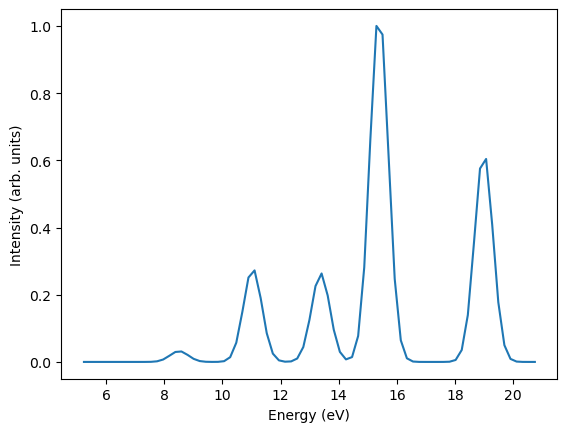

In [25]:
### BEGIN SOLUTION
plt.figure()
plt.plot(np_energies_ev[25:], np_intensities[25:])
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()
### END SOLUTION

Numpy-arrayer kan också skivas med hjälp av villkor:

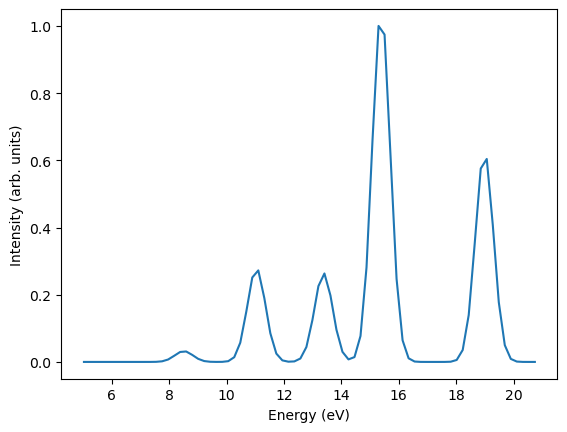

In [26]:
plt.figure()
plt.plot(np_energies_ev[np_energies_ev>5], np_intensities[np_energies_ev>5])
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()

Villkoret i sig blir en boolesk numpy-array som används som en "mask":

In [27]:
print(np_energies_ev>5)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


# Interpolation/Fitting

Utöver att erbjuda ett bekvämt format och en uppsättning funktioner för att manipulera listor med siffror, erbjuder numpy (liksom det relaterade biblioteket scipy) många funktioner för att utföra dataanalys, särskilt interpolation och anpassning.

Låt oss börja med interpolation, som kan vara användbart till exempel för att skapa snyggare kurvor från begränsade data.

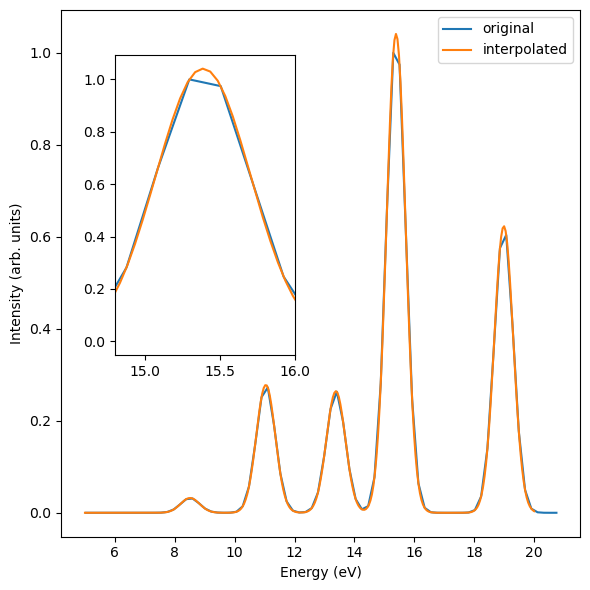

In [28]:
from scipy import interpolate

f = interpolate.interp1d(np_energies_ev, np_intensities, kind = "cubic") #Kubisk interpolation

new_energies = np.linspace(5,20,300) #300 punkter för ökad upplösning

fig,ax=plt.subplots(figsize=(6,6))
plt.plot(np_energies_ev[np_energies_ev>5], np_intensities[np_energies_ev>5], label = "original")
plt.plot(new_energies, f(new_energies), label = "interpolated")
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend()
plt.tight_layout()
axin = fig.add_axes([0.2, 0.4, 0.3, 0.5])
plt.plot(np_energies_ev[np_energies_ev>5], np_intensities[np_energies_ev>5], label = "original")
plt.plot(new_energies, f(new_energies), label = "interpolated")
plt.xlim([14.8,16])
plt.show()

Interpolation i praktiken innebär att passa in en kurva lokalt till ett polynom. Det kan dock vara mycket känsligt för brus.

Ofta vill vi passa in våra data i en analytisk funktion inte för att göra en figur snyggare, utan för att bestämma några fria parametrar i teorin. I dessa fall känner vi till formen (formeln) som vi förväntar oss att kurvorna ska ha, men vi saknar de fysikaliska parametrarna (reaktionshastighetskonstant, exciteringsenergi, NMR-skift, etc...), och genom att göra passningen kan vi hitta parametrarna och därmed få insikt i det kemiska problemet.

Numpy och scipy har flera funktioner för att göra detta. Ett av de enklare och mer flexibla alternativen är "curve_fit" i scipy. Eftersom vårt spektrum tydligt består av flera toppar kan vi försöka fokusera på en i taget. Låt oss försöka anpassa toppen mellan 18 eV och 20 eV:

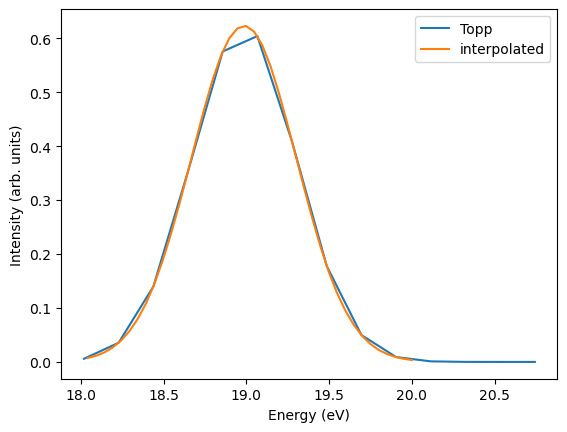

In [29]:
topp_x = np_energies_ev[np_energies_ev>18]
topp_y = np_intensities[np_energies_ev>18]

plt.figure()
plt.plot(topp_x, topp_y, label = "Topp")
plt.plot(new_energies[new_energies>18], f(new_energies[new_energies>18]), label = "interpolated")
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend()
plt.show()

För att använda curve_fit behöver du definiera en funktion som beskriver den kurva du vill anpassa till data. Denna funktion ska ha parametrar som ska anpassas och ta in x-värden som argument. Funktionen ska returnera y-värdena för den anpassade kurvan baserat på de givna x-värdena och de anpassade parametrarna.

Här vi provar med en gaussisk funktion:

Optimala parametrar: 0.6246171232827216 5.0104839787731965 18.98514846931258


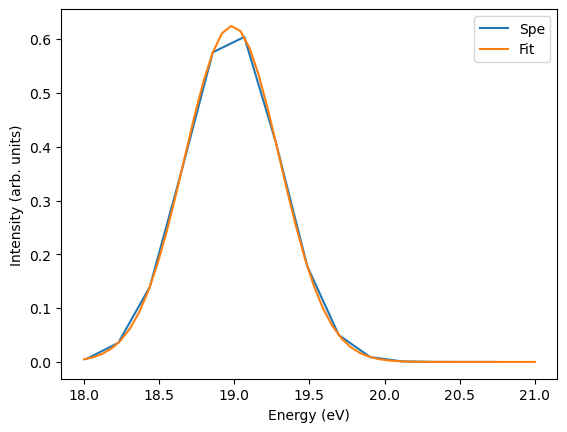

In [30]:
from scipy.optimize import curve_fit

def gauss(x,A,kappa, x0):
    return A*np.exp(-kappa*(x-x0)**2)

# Gör en initial gissning
p0=[1,1,19.0]

# Optimera
popt,pcov = curve_fit(gauss, xdata=topp_x, ydata=topp_y,p0=p0)

A_opt, k_opt, x0_opt = popt
print("Optimala parametrar:",A_opt, k_opt, x0_opt)

tät_x = np.linspace(18,21,50)

plt.figure()
plt.plot(topp_x, topp_y, label = "Spe")
plt.plot(tät_x, gauss(tät_x, A_opt, k_opt, x0_opt) , label = "Fit")
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend()
plt.show()

Nu kan vi prova med hela spektrumet. Vi ska begränsa oss till bara 2 funktioner:

Optimala parametrar: 0.6246171232821086 5.010483978751937 18.985148469312392 1.0435691644058678 5.008406931306403 15.387751541938217


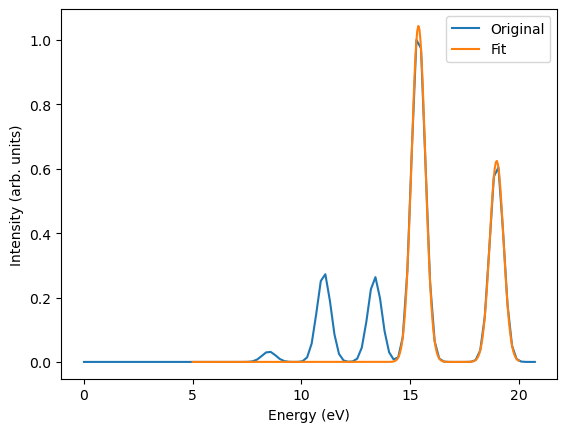

In [31]:
def gauss2(x,A1,kappa1, x01, A2,kappa2, x02):
    return A1*np.exp(-kappa1*(x-x01)**2) + A2*np.exp(-kappa2*(x-x02)**2)

# Gör en initial gissning
p0=[1,1,19.0, 1,1,15.0]

# Optimera
popt,pcov = curve_fit(gauss2, xdata=np_energies_ev, ydata=np_intensities,p0=p0)

A1_opt, k1_opt, x01_opt, A2_opt, k2_opt, x02_opt = popt
print("Optimala parametrar:", A1_opt, k1_opt, x01_opt, A2_opt, k2_opt, x02_opt)
                     
plt.figure()
plt.plot(np_energies_ev, np_intensities, label = "Original")
plt.plot(new_energies, gauss2(new_energies, A1_opt, k1_opt, x01_opt, A2_opt, k2_opt, x02_opt) , label = "Fit")
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend()
plt.show()

Notera att anpassning beror på vilken startpunkt vi anger:

Optimala parametrar: 0.0321423586022794 5.010485444263294 8.509071866945087 0.2784832825790365 5.010191910095324 11.038453294028008


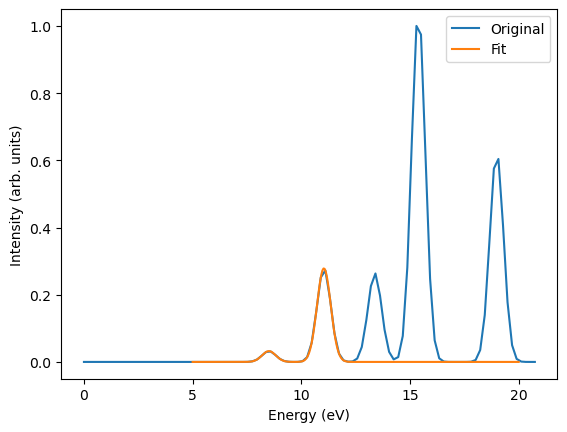

In [32]:
# En annan initial gissning
p0=[1,1,10.0, 1,1,12.0]

# Optimera
popt,pcov = curve_fit(gauss2, xdata=np_energies_ev, ydata=np_intensities,p0=p0)

A1_opt, k1_opt, x01_opt, A2_opt, k2_opt, x02_opt = popt
print("Optimala parametrar:", A1_opt, k1_opt, x01_opt, A2_opt, k2_opt, x02_opt)
                     
plt.figure()
plt.plot(np_energies_ev, np_intensities, label = "Original")
plt.plot(new_energies, gauss2(new_energies, A1_opt, k1_opt, x01_opt, A2_opt, k2_opt, x02_opt) , label = "Fit")
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend()
plt.show()

Och det är absolute möjligt att få problem om man börjar med en "dålig" startpunkt:

Optimala parametrar: 0.9676962579367144 6.451296715299868 15.385637745685278 0.11925198627332263 0.012080355251001963 19.33408045456352


/var/folders/rl/826y2prx13xgvl4rzszhv1vr0000gn/T/ipykernel_23221/4175724152.py:2: RuntimeWarning: overflow encountered in exp
  return A1*np.exp(-kappa1*(x-x01)**2) + A2*np.exp(-kappa2*(x-x02)**2)


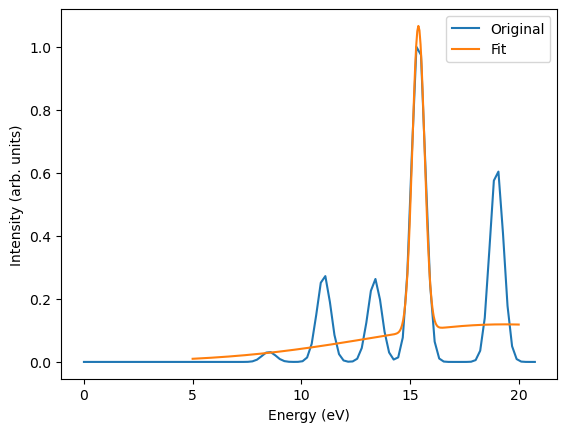

In [33]:
# En annan initial gissning
p0=[1,1,10.0, 1,1,10.0]

# Optimera
popt,pcov = curve_fit(gauss2, xdata=np_energies_ev, ydata=np_intensities,p0=p0)

A1_opt, k1_opt, x01_opt, A2_opt, k2_opt, x02_opt = popt
print("Optimala parametrar:", A1_opt, k1_opt, x01_opt, A2_opt, k2_opt, x02_opt)
                     
plt.figure()
plt.plot(np_energies_ev, np_intensities, label = "Original")
plt.plot(new_energies, gauss2(new_energies, A1_opt, k1_opt, x01_opt, A2_opt, k2_opt, x02_opt) , label = "Fit")
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend()
plt.show()

Optimala parametrar: -8.054725260731098e-14 1.0000004902926645 -4.082508223351325e-08 8.12703046538614e-14 0.9999998274021553 0.9999996999402947


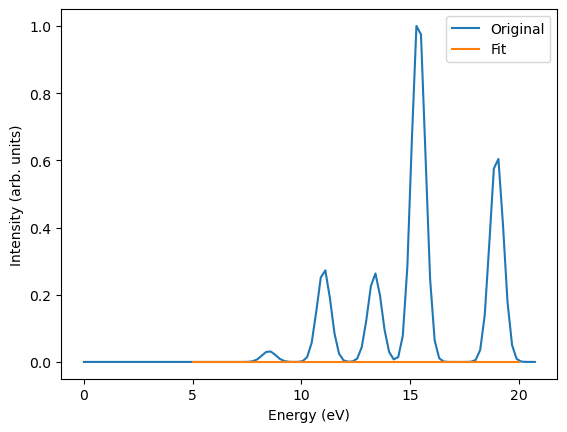

In [34]:
# En annan initial gissning
p0=[1,1,0.0, 1,1,1]

# Optimera
popt,pcov = curve_fit(gauss2, xdata=np_energies_ev, ydata=np_intensities,p0=p0)

A1_opt, k1_opt, x01_opt, A2_opt, k2_opt, x02_opt = popt
print("Optimala parametrar:", A1_opt, k1_opt, x01_opt, A2_opt, k2_opt, x02_opt)
                     
plt.figure()
plt.plot(np_energies_ev, np_intensities, label = "Original")
plt.plot(new_energies, gauss2(new_energies, A1_opt, k1_opt, x01_opt, A2_opt, k2_opt, x02_opt) , label = "Fit")
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend()
plt.show()

Naturligtvis ju fler parametrar och desto svårare blir anpassningen och desto känsligare blir den till startpunkten.

**Övning:** Här återkommer vi till data som vi skapade i föreläsning 4. Först, plotta Cr mot tiden t. Sen prova anpassning med
* lineär funktion
* kvadratisk funktion
* exponential funktion, är avklingningsvärdet vad det borde vara?

In [35]:
import random
C = 1.
k=0.2
dt = 0.01
T=3000
Cr = []
t = []
Cr.append(C)
t.append(0)
for i in range(0,T):
    C = C*(1.-k*dt)
    Cr.append(C+random.gauss(0.0,0.05)) # Här simulerar vi experimentellt "brus"
    t.append((i+1)*dt)

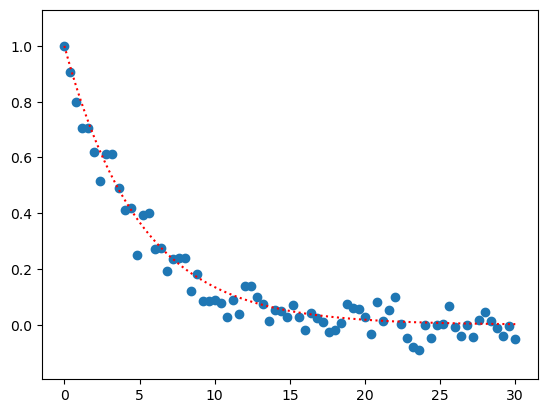

In [36]:
### BEGIN SOLUTION
plt.plot(t,Cr,ls='',marker='o',markevery=40)
t0 = np.linspace(0,30,1000)
plt.plot(t0,np.exp(-k*t0),ls=':',c='r')
plt.show()
### END SOLUTION

A, kappa: [-0.02218901  0.49724364]
Error: [0.00030592 0.00529907]


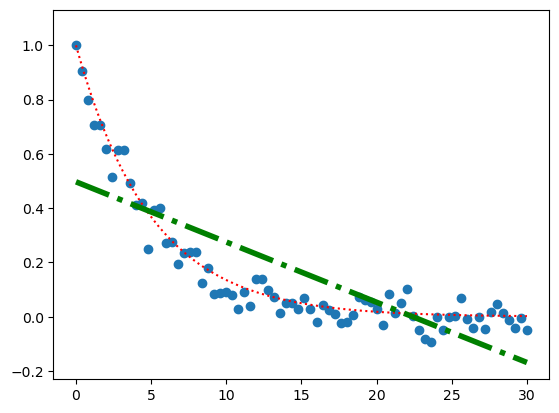

In [37]:
### BEGIN SOLUTION
def f(t,A,B):
    return A*t + B

popt, pcov = curve_fit(f,t,Cr)
print("A, kappa:",popt)
perr = np.sqrt(np.diag(pcov))
print("Error:",perr)
plt.plot(t,Cr,ls='',marker='o',markevery=40)
t0 = np.linspace(0,30,1000)
plt.plot(t0,np.exp(-k*t0),ls=':',c='r')
plt.plot(t0,f(t0,*popt),ls='-.',c='g',lw=4)
plt.show()
### END SOLUTION

A, kappa: [ 0.00183841 -0.07734128  0.77291307]
Error: [2.07820896e-05 6.43922905e-04 4.18231480e-03]


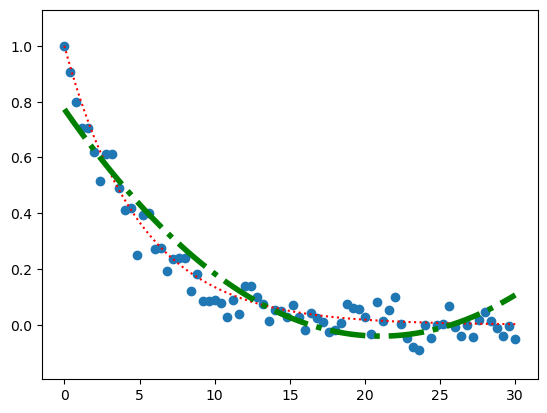

In [38]:
### BEGIN SOLUTION
def f(t,A,B,C):
    return A*t**2 + B*t + C

popt, pcov = curve_fit(f,t,Cr)
print("A, kappa:",popt)
perr = np.sqrt(np.diag(pcov))
print("Error:",perr)
plt.plot(t,Cr,ls='',marker='o',markevery=40)
t0 = np.linspace(0,30,1000)
plt.plot(t0,np.exp(-k*t0),ls=':',c='r')
plt.plot(t0,f(t0,*popt),ls='-.',c='g',lw=4)
plt.show()
### END SOLUTION

A, kappa: [1.00190297e+00 2.02852565e-01 3.47794185e-05]
Error: [0.00442552 0.00172595 0.00149001]


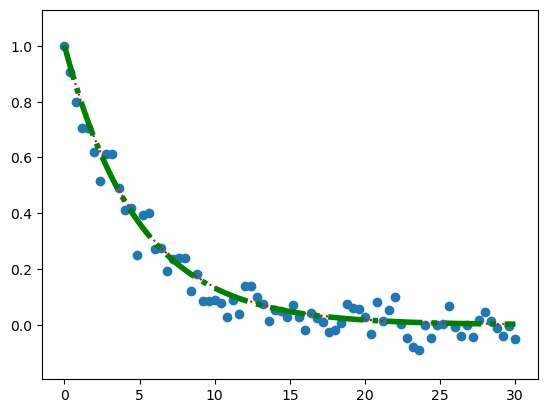

In [39]:
### BEGIN SOLUTION
def f(t,A,kappa, B):
    return A*np.exp(-kappa*t)+B

popt, pcov = curve_fit(f,t,Cr)
print("A, kappa:",popt)
perr = np.sqrt(np.diag(pcov))
print("Error:",perr)
plt.plot(t,Cr,ls='',marker='o',markevery=40)
t0 = np.linspace(0,30,1000)
plt.plot(t0,np.exp(-k*t0),ls=':',c='r')
plt.plot(t0,f(t0,*popt),ls='-.',c='g',lw=4)
plt.show()
### END SOLUTION